### 1. 데이터 확인

In [1]:
import pandas as pd

# 데이터 불러오기
housing = pd.read_csv('housingdata.csv')

# 데이터 미리보기
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [2]:
# 데이터셋 기본 정보 확인
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [3]:
# 데이터 정보 탐색
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


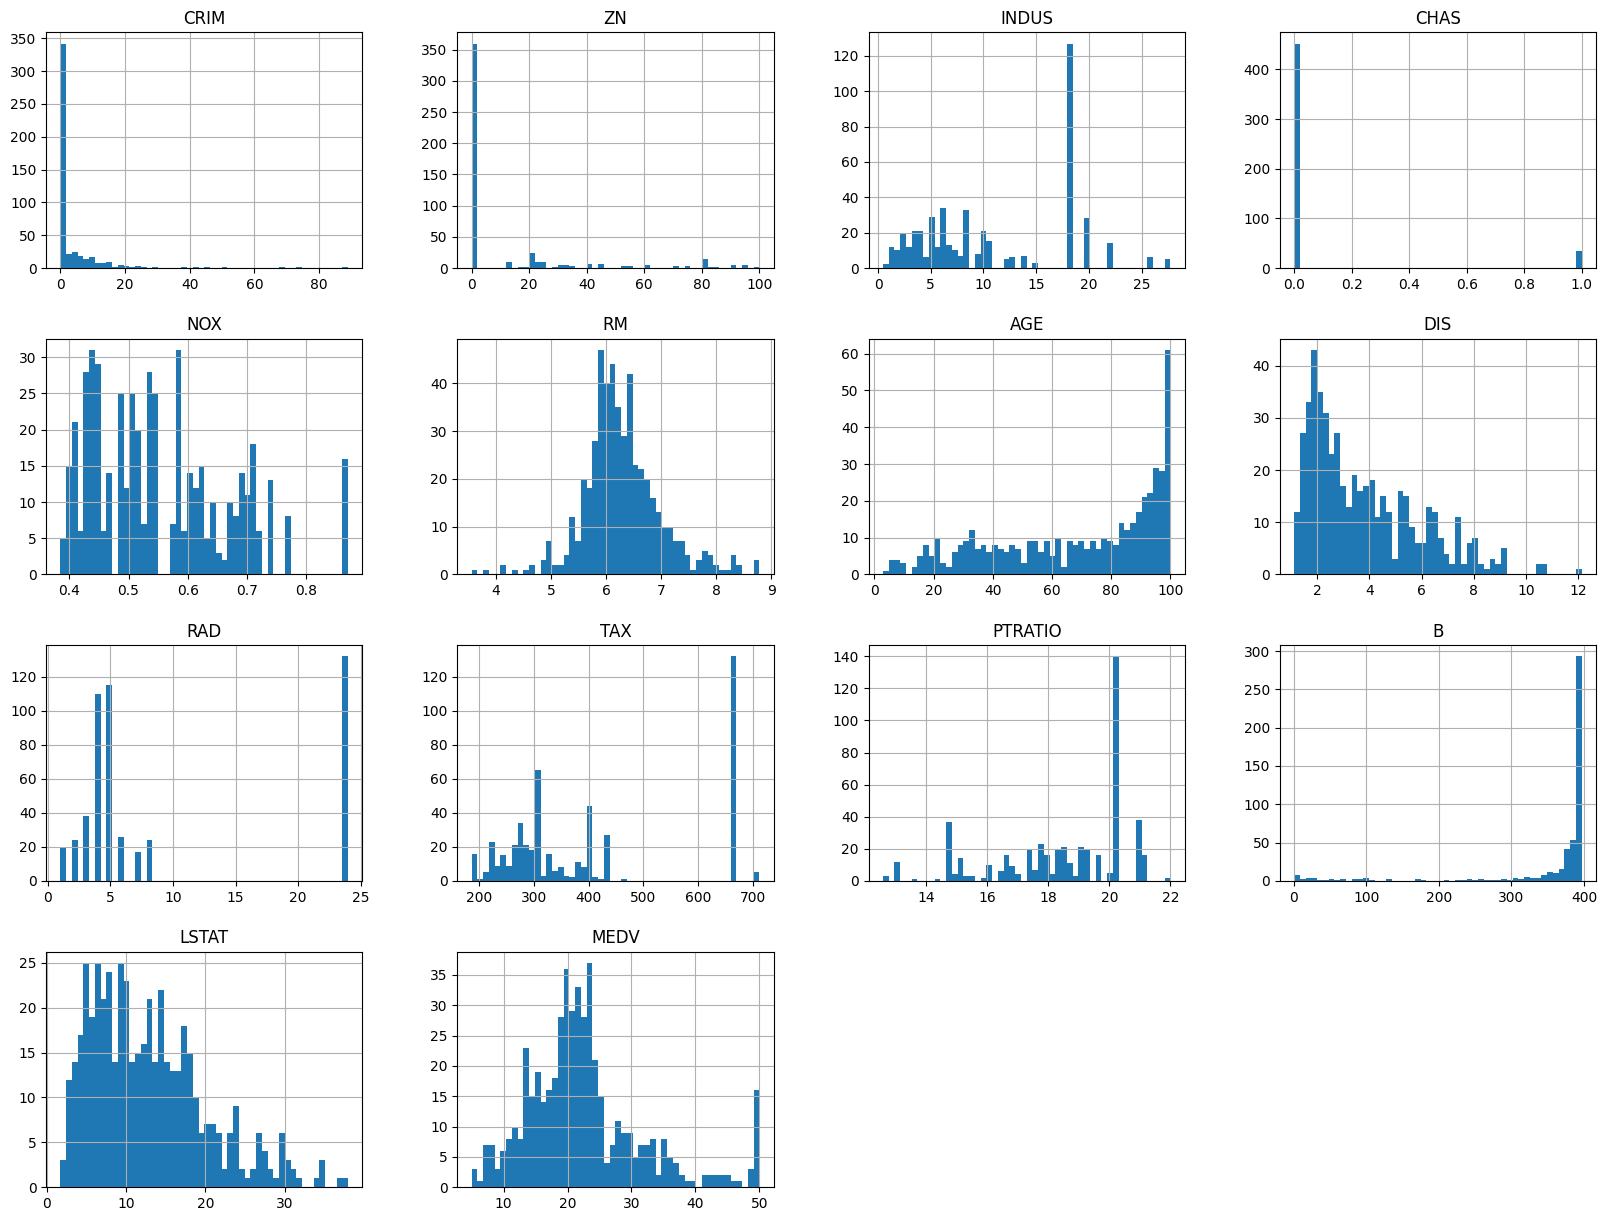

In [4]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))
plt.show()

### 2. 데이터 전처리

#### 결측치 처리

In [5]:
# 결측치 개수 확인
housing.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [6]:
# 결측치 비율 확인
missing_percentage= (housing.isnull().sum() / len(housing)) * 100
missing_percentage

CRIM       3.952569
ZN         3.952569
INDUS      3.952569
CHAS       3.952569
NOX        0.000000
RM         0.000000
AGE        3.952569
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
LSTAT      3.952569
MEDV       0.000000
dtype: float64

In [7]:
# 결측치 처리
from sklearn.impute import SimpleImputer

# 수치형데이터 결측치 > 중앙값 대체
imputer = SimpleImputer(strategy='median')

for col in ['CRIM', 'ZN', 'INDUS', 'AGE', 'LSTAT'] :
    housing[col] = imputer.fit_transform(housing[[col]])

# 범주형 데이터 결측치 > 최빈값 대체
imputer2 = SimpleImputer(strategy= 'most_frequent')

housing['CHAS'] = imputer2.fit_transform(housing[['CHAS']])

#### 이상치 처리

In [8]:
import numpy as np

numeric_cols = housing.select_dtypes(include=[np.number]).columns # 수치형 데이터를 가진 열들의 이름 가져오기
housing_processed = housing.copy()


for col in numeric_cols:
    Q1 = housing[col].quantile(0.25)
    Q3 = housing[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((housing[col] < lower_bound) | (housing[col] > upper_bound))
    outlier_count = outliers.sum()

    if outlier_count > 0:
        # 이상치를 경계값으로 대체 (Winsorization)
        housing_processed[col] = housing_processed[col].clip(lower=lower_bound, upper=upper_bound)

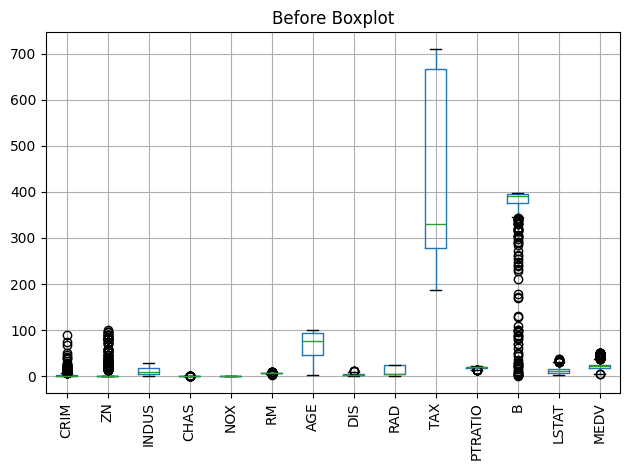

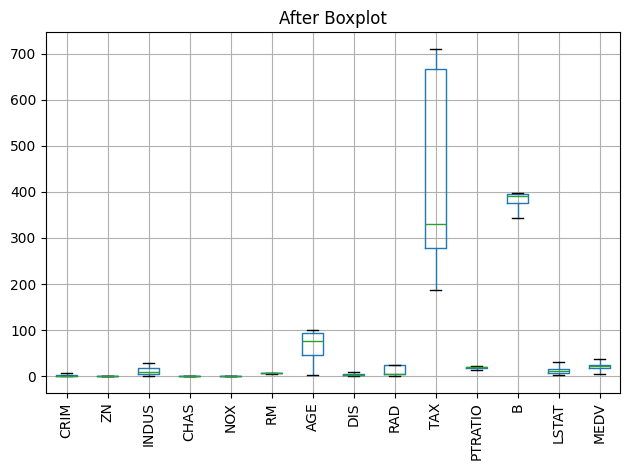

In [9]:
# 이상치 처리 전 데이터 시각화
housing.boxplot()
plt.xticks(rotation=90)
plt.title('Before Boxplot')
plt.tight_layout()
plt.show()

# 이상치 처리 후 데이터 시각화
housing_processed.boxplot()
plt.xticks(rotation=90)
plt.title('After Boxplot')
plt.tight_layout()
plt.show()

#### 상관관계

In [10]:
# 데이터 상관관계 확인
corr_matrix = housing_processed.corr()
corr_matrix['MEDV'].abs().sort_values(ascending=False)

MEDV       1.000000
LSTAT      0.782941
RM         0.697645
INDUS      0.553140
TAX        0.543545
PTRATIO    0.523993
CRIM       0.522140
NOX        0.506505
AGE        0.454330
RAD        0.452679
DIS        0.333079
B          0.321250
ZN              NaN
CHAS            NaN
Name: MEDV, dtype: float64

In [11]:
# 시각화 분석
plot_cols = ['MEDV', 'LSTAT', 'RM', 'INDUS', 'TAX', 'PTRATIO', 'CRIM', 'NOX', 'AGE', 'RAD', 'DIS', 'B']
plot_housing = housing.loc[:, plot_cols]
plot_housing

,MEDV,LSTAT,RM,INDUS,TAX,PTRATIO,CRIM,NOX,AGE,RAD,DIS,B
0,24.0,4.98,6.575,2.31,296,15.3,0.00632,0.538,65.2,1,4.0900,396.90
1,21.6,9.14,6.421,7.07,242,17.8,0.02731,0.469,78.9,2,4.9671,396.90
2,34.7,4.03,7.185,7.07,242,17.8,0.02729,0.469,61.1,2,4.9671,392.83
3,33.4,2.94,6.998,2.18,222,18.7,0.03237,0.458,45.8,3,6.0622,394.63
4,36.2,11.43,7.147,2.18,222,18.7,0.06905,0.458,54.2,3,6.0622,396.90
...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,11.43,6.593,11.93,273,21.0,0.06263,0.573,69.1,1,2.4786,391.99
502,20.6,9.08,6.120,11.93,273,21.0,0.04527,0.573,76.7,1,2.2875,396.90
503,23.9,5.64,6.976,11.93,273,21.0,0.06076,0.573,91.0,1,2.1675,396.90
504,22.0,6.48,6.794,11.93,273,21.0,0.10959,0.573,89.3,1,2.3889,393.45


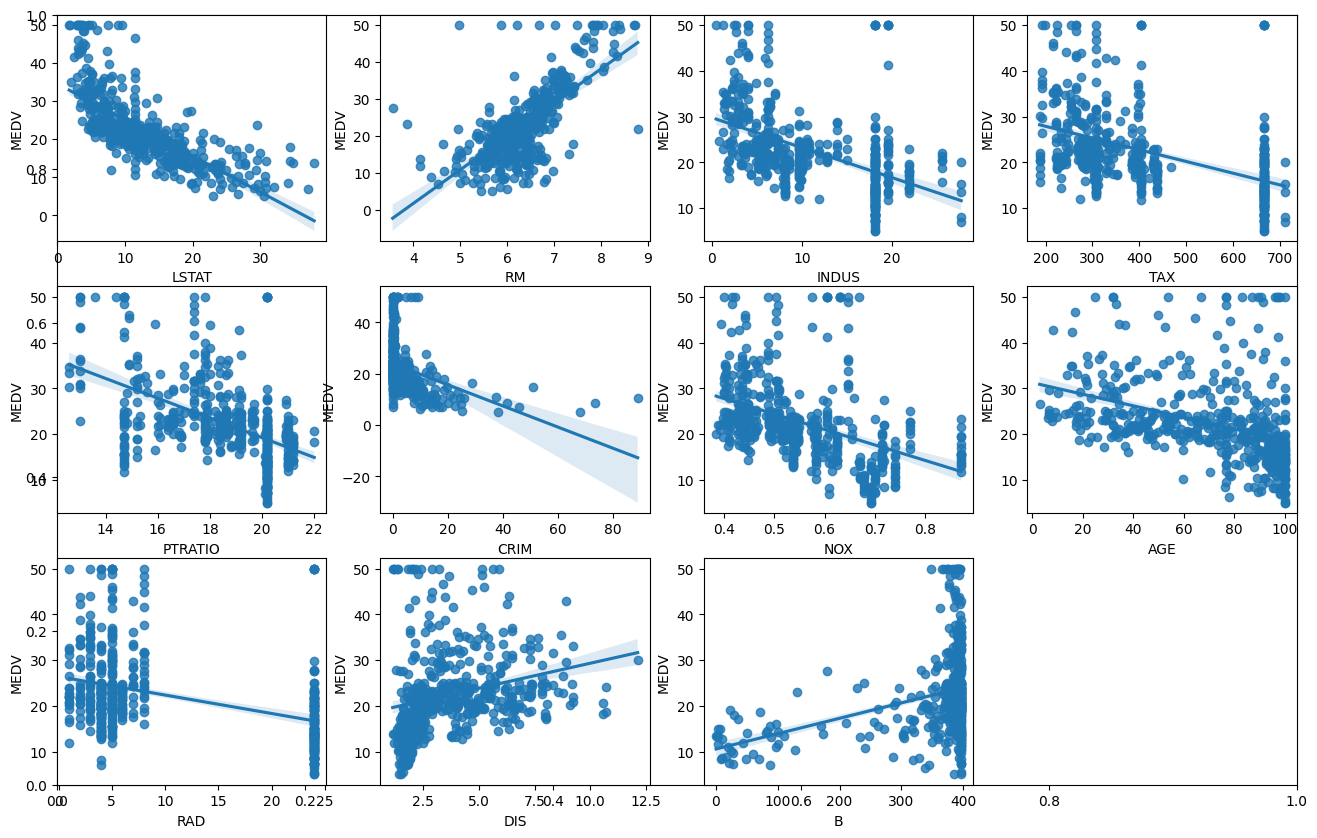

In [12]:
import seaborn as sns

# 선형 회귀선 표시
fig, axs = plt.subplots(figsize=(16, 10))
for i, feature in enumerate(plot_cols[1:]) :
    ax1 = plt.subplot(3,4,i+1)
    sns.regplot(x=feature, y=plot_cols[0], data=plot_housing, ax=ax1)

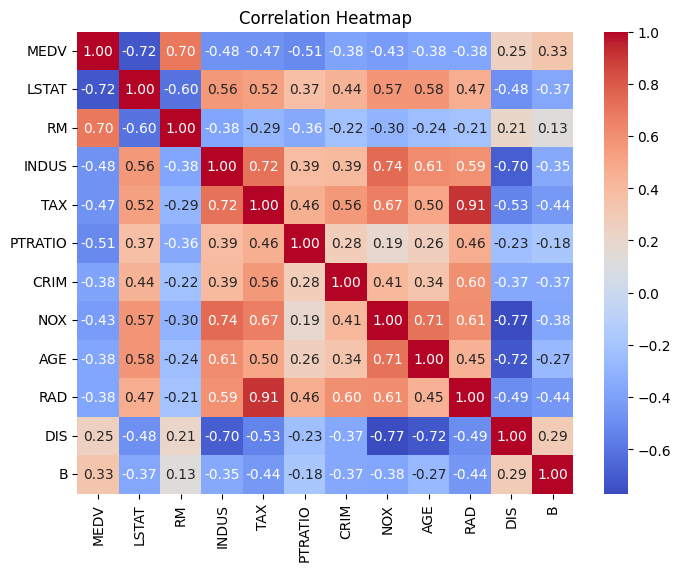

In [13]:
# 상관관계 히트맵
plt.figure(figsize=(8, 6))
sns.heatmap(plot_housing.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### 3. 특성과 타겟 변수 분리

In [14]:
# 특성과 타겟 변수 분리
X = housing_processed[['LSTAT', 'RM', 'INDUS', 'TAX', 'PTRATIO', 'CRIM', 'NOX', 'AGE', 'RAD']]  # 독립 변수
y = housing_processed['MEDV']  # 타겟 변수

### 4. 모델 선택 및 훈련

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


#### 선형회귀

In [16]:
from sklearn.linear_model import LinearRegression

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 선형 회귀 모델 생성 및 학습
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# 예측 
y_lr_pred = lr.predict(X_test_scaled)

# 모델 평가
lr_mae = mean_absolute_error(y_test, y_lr_pred)
lr_mse = mean_squared_error(y_test, y_lr_pred)
lr_r2 = r2_score(y_test, y_lr_pred)

# 데이터 확인
print(f'Mean Absolute Error (MAE) : {lr_mae}')
print(f'Mean Squared Error (MSE) : {lr_mse}')
print(f'R² Score : {lr_r2}')

Mean Absolute Error (MAE) : 2.4453889135453672
Mean Squared Error (MSE) : 13.000497397359682
R² Score : 0.7342767362613231


#### 다항 회귀

In [17]:
from sklearn.preprocessing import PolynomialFeatures

# 다항 특징 생성 (차수 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 다항 회귀 모델 생성 및 학습
pr = LinearRegression()
pr.fit(X_train_scaled, y_train)

# 예측 
y_pr_pred = pr.predict(X_test_scaled)

# 모델 평가
pr_mae = mean_absolute_error(y_test, y_pr_pred)
pr_mse = mean_squared_error(y_test, y_pr_pred)
pr_r2 = r2_score(y_test, y_pr_pred)

print(f'Mean Absolute Error (MAE) : {pr_mae}')
print(f'Mean Squared Error (MSE) : {pr_mse}')
print(f'R² Score : {pr_r2}')

Mean Absolute Error (MAE) : 2.134639600280091
Mean Squared Error (MSE) : 8.770446963886869
R² Score : 0.8207367210300507


#### 의사결정나무

In [18]:
from sklearn.tree import DecisionTreeRegressor

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 의사결정 나무 모델 초기화 및 학습
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_scaled, y_train)

# 테스트 세트로 예측 수행
y_tree_pred = tree_model.predict(X_test_scaled)

# 모델 평가
tree_mae = mean_absolute_error(y_test, y_tree_pred)
tree_mse = mean_squared_error(y_test, y_tree_pred)
tree_r2 = r2_score(y_test, y_tree_pred)

print(f'Mean Absolute Error (MAE) : {tree_mae}')
print(f'Mean Squared Error (MSE) : {tree_mse}')
print(f'R² Score : {tree_r2}')


Mean Absolute Error (MAE) : 2.6892156862745105
Mean Squared Error (MSE) : 13.765199142156861
R² Score : 0.7186466386424861


#### 랜덤포레스트

In [19]:
from sklearn.ensemble import RandomForestRegressor

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 랜덤포레스트 모델 초기화 및 학습
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# 테스트 세트로 예측 수행
y_rf_pred = rf_model.predict(X_test_scaled)

# 모델 평가
rf_mae = mean_absolute_error(y_test, y_rf_pred)
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

print(f'Mean Absolute Error (MAE) : {rf_mae}')
print(f'Mean Squared Error (MSE) : {rf_mse}')
print(f'R² Score : {rf_r2}')

Mean Absolute Error (MAE) : 1.923014705882351
Mean Squared Error (MSE) : 6.305202024203432
R² Score : 0.8711250185901873


#### 리지 회귀

In [20]:
from sklearn.linear_model import Ridge

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 리지 회귀 모델 생성 및 학습
ri = Ridge(alpha=1.0)
ri.fit(X_train_scaled, y_train)

# 예측
y_ri_pred = ri.predict(X_test_scaled)

# 모델 평가
ri_mae = mean_absolute_error(y_test, y_ri_pred)
ri_mse = mean_squared_error(y_test, y_ri_pred)
ri_r2 = r2_score(y_test, y_ri_pred)

print(f'Mean Absolute Error (MAE) : {ri_mae}')
print(f'Mean Squared Error (MSE) : {ri_mse}')
print(f'R² Score : {ri_r2}')

Mean Absolute Error (MAE) : 2.4510054173492133
Mean Squared Error (MSE) : 13.02445564009386
R² Score : 0.7337870425012933


#### 라쏘 회귀

In [21]:
from sklearn.linear_model import Lasso

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 라쏘 회귀 모델 생성 및 학습
model = Lasso(alpha=1.0)
model.fit(X_train_scaled, y_train)

# 예측
y_ls_pred = model.predict(X_test_scaled)

# 모델 평가
ls_mae = mean_absolute_error(y_test, y_ls_pred)
ls_mse = mean_squared_error(y_test, y_ls_pred)
ls_r2 = r2_score(y_test, y_ls_pred)

print(f'Mean Absolute Error (MAE) : {ls_mae}')
print(f'Mean Squared Error (MSE) : {ls_mse}')
print(f'R² Score : {ls_r2}')

Mean Absolute Error (MAE) : 2.7354787015545545
Mean Squared Error (MSE) : 13.753570485035056
R² Score : 0.7188843222194186


### 5. 모델 평가

In [22]:
# 모델별 성능 저장
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression', 'Decision Tree', 'Random Forest', 'Ridge Regression', 'Lasso Regression'],
    'MAE': [lr_mae, pr_mae, tree_mae, rf_mae, ri_mae, ls_mae],
    'MSE': [lr_mse, pr_mse, tree_mse, rf_mse, ri_mse, ls_mse],
    'R2': [lr_r2, pr_r2, tree_r2, rf_r2, ri_r2, ls_r2]
})

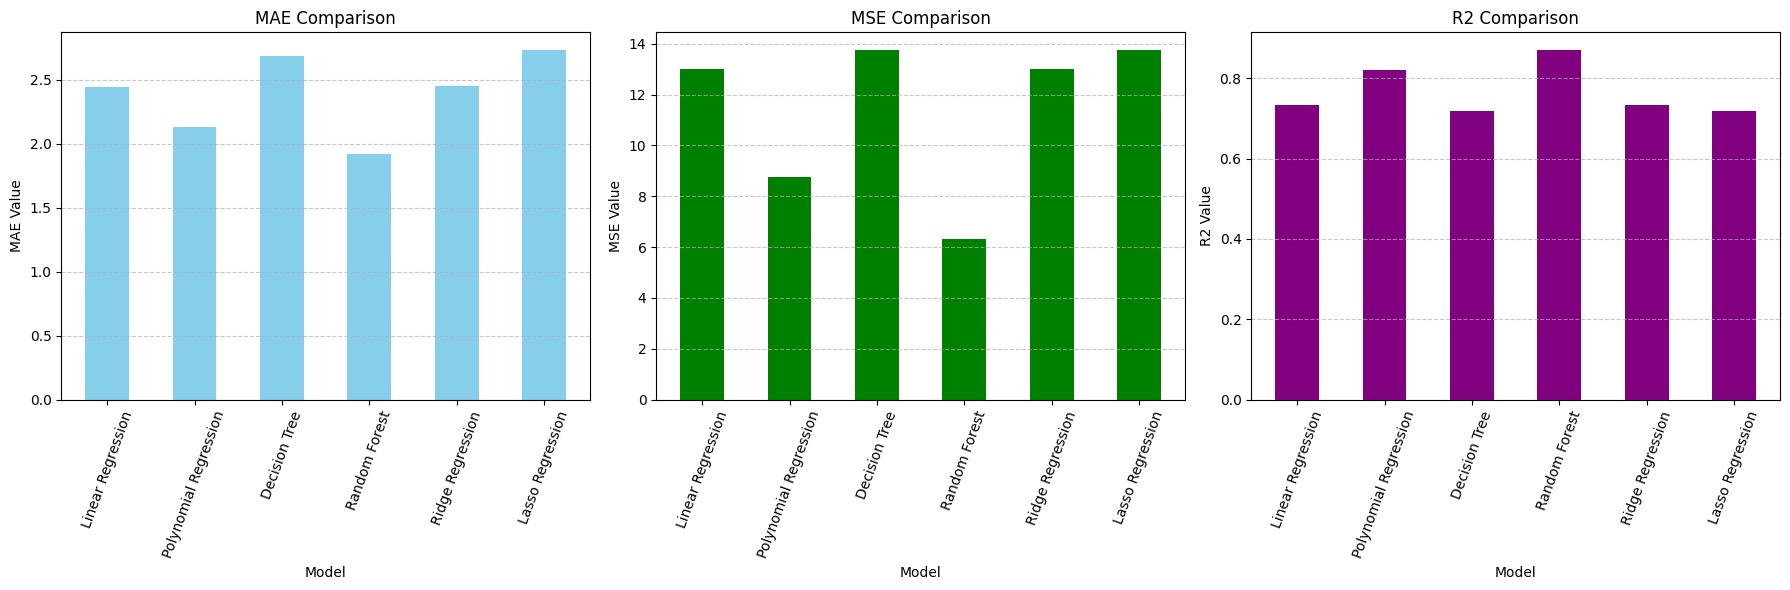

In [23]:
# 서브플롯 생성
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  

colors = ['skyblue', 'green', 'purple']

# 그래프를 각각 생성
for ax, metric, color in zip(axes, ['MAE', 'MSE', 'R2'], colors):
    ax.bar(results['Model'], results[metric], color=color, width=0.5)
    ax.set_title(f'{metric} Comparison')
    ax.set_ylabel(f'{metric} Value')
    ax.set_xlabel('Model')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    # x축 기울기
    ax.set_xticks(np.arange(len(results['Model'])))
    ax.set_xticklabels(results['Model'], rotation=70)

# 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()